In [1]:
%matplotlib inline
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib import cm
import matplotlib.pyplot as plt

plt.style.use('science')

# 1D Advection-Diffusion Equation

The one-dimensional advection-diffusion equation is written as

$$ \frac{\partial \eta}{\partial t} = - u\frac{\partial \eta}{\partial x} + D \frac{\partial^2 \eta}{\partial x^2}$$
with $u$ being the velocity constant, $D$ being the diffusion coefficient, and $\eta$ represents the concentration field. The time derivative of the Fourier Transform $\widetilde{\eta}_{k}$ is 
$$\frac{\partial }{\partial t}\widetilde{\eta}_{k}(t) = -(i u k + D k^2)\widetilde{\eta}_{k}(t)$$
This case corresponds to the pseudo-spectral equation 
$$ \frac{\partial \widetilde{\eta}_{k}}{\partial t} = \widetilde{\mathcal{L}}_{k} \widetilde{\eta}_{k} + \widetilde{\mathcal{N}}_{k} (\eta(t))$$
 with the following operators given by 
$$\widetilde{\mathcal{L}}_{k} = -(i u k + D k^2), \quad \text{and} \quad \widetilde{\mathcal{N}}_{k} = 0$$
such that the time evolution has an analytical solution in the form
$$\widetilde{\eta}_{k}(t) = \widetilde{\eta}_{k}(0) e^{-(i u k + D k^2) t}$$

As an example, we set $u = 5$ and $D=0.01$. The size of the system is $L=2\pi$ with the number of gridpoints $N=2^{12} = 4096$. The initial profile is a top-hat function with length of $l=0.2$ and intensity of $\eta_0 = 1.0$ starting at $x_0 = -\pi$.

In [2]:
import numpy as np
from scipy.fft import fft, ifft
# Size of the system
x = np.linspace(-np.pi,np.pi,2**12)
N = x.size
dx = x[1]-x[0]
# The time step definition
dt = 0.001
Nsteps = 1000
# Initial condition
n0 = np.zeros_like(x)
l = int(0.2/dx)
n0[:l] = 1.0 
# The vector of variables
n_hat = np.empty(N, dtype=np.complex64)
n = np.empty((Nsteps,N), dtype=np.float32)
n[0] = n0
# The Fourier variables and dealising vector
k = np.fft.fftfreq(N, d=dx)*2*np.pi
# The linear terms of PDE
def linear_terms_ft(k):
    # diffusion-advection constants
    D = 0.01
    u = 5.0
    return -1.0j*k*u-D*k**2
# Defining the time derivative arrays
dndtlinear_hat = np.exp(dt*linear_terms_ft(k)) # can be calculated once
# time evolution loop
n_hat[:] = fft(n[0]) # FT initial condition
for i in range(1,Nsteps):
    n_hat[:] = n_hat*dndtlinear_hat # updating in time
    n[i] = ifft(n_hat).real # IFT to next step

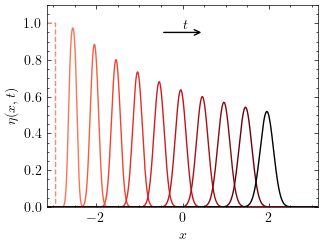

In [4]:
fig, ax = plt.subplots(1,1)

my_map = cm.get_cmap('Reds')
color = my_map(np.linspace(0.4,1.0,Nsteps//100))
plt.plot(x,n[0],'--',color=color[0])
for i in range(1,Nsteps//100):
    plt.plot(x,n[100*i],'-',color=color[i])
plt.plot(x,n[-1],'-k')
plt.xlabel('$x$')
plt.ylabel('$\eta(x,t)$')
plt.annotate("", xy=(0.5, 0.95), xytext=(-0.5, 0.95),
            arrowprops=dict(arrowstyle="->"))
plt.text(0.0,0.97,"$t$")
plt.xlim(-np.pi,np.pi)
plt.ylim(0.,1.1)
fig.savefig('diffusion_advection.pdf')

# Generating a MP4 video

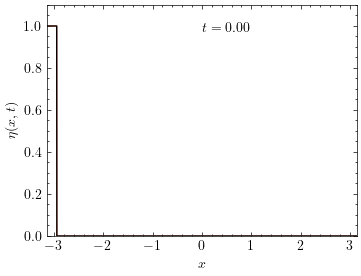

In [8]:
my_map = cm.get_cmap('Reds')
color = my_map(np.linspace(0.4,1.0,Nsteps//100))
def animate(i):
    ax.clear()
    for j in range(i//100+1):
        ax.plot(x,n[100*j],'-',color=color[j])
    ax.plot(x,n[i],'-k')
    ax.text(0.0,0.97,'$t={:.2f}$'.format(i*dt))
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(0.0,1.1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\eta(x,t)$')
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= Nsteps,
                               interval = 50)
writervideo = animation.FFMpegWriter(fps=100) 
ani.save('diffusion_advection.mp4',writer=writervideo,dpi=200)